#results of 2 best fairness techniques





##X2,threshold optimizer(constraint = equalized odds):Accuracy:0.6486693030958083
Statistical Parity Difference: 0.002715109832541626

Statistical Parity ratio: 0.977359385758342

Equalized Odds Difference: 0.029949250616581324

Equalized Odds Ratio: 0.9176942127215849

In [2]:
# Installing the fairlearn package
!pip install fairlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.5/231.5 kB 3.9 MB/s eta 0:00:00


In [3]:
!pip install xlrd

In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, precision_score, roc_auc_score
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import json
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, precision_score, roc_auc_score
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
import seaborn as sns
from fairlearn.preprocessing import CorrelationRemover
from sklearn.pipeline import Pipeline
from fairlearn.reductions import DemographicParity, ExponentiatedGradient
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, precision_score, roc_auc_score
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
import seaborn as sns
from fairlearn.preprocessing import CorrelationRemover
from sklearn.pipeline import Pipeline
from fairlearn.reductions import DemographicParity, ExponentiatedGradient
from fairlearn.postprocessing import ThresholdOptimizer, plot_threshold_optimizer
from sklearn.inspection import permutation_importance


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


#reading file
file_path = '/content/default of credit card clients (2).xls'

# Read Excel file into a DataFrame
df = pd.read_excel(file_path)

X=df.drop(columns=['Unnamed: 0'])

# continue with preperation
X=X.drop(columns=['Y'])

#get list of feature names
feature_names= X.iloc[0].values
feature_names = np.array(feature_names)
X=X.drop(index=0)

y=df['Y']
y=y.drop(index=0)

y=pd.to_numeric(y)
y.head()
X = X[X['X3'] != 0]
X['X3'] = X['X3'].replace({5: 4, 6: 4})
X = X[X['X4'] != 0]
X['X4'] = X['X4'].replace({4:3,5: 3, 6: 3})
y = y[X.index]  # Update y to match the filtered rows in X
for column in X:
    X[column] = pd.to_numeric(X[column])
    X[column].head()


print(X)
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#
#sensitive_test = X_test['X2']



y.head()

<ipython-input-5-8d4441c1fb7c>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['X3'] = X['X3'].replace({5: 4, 6: 4})


           X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  ...     X14    X15    X16  \
1       20000   2   2   1  24   2   2  -1  -1   -2  ...     689      0      0   
2      120000   2   2   2  26  -1   2   0   0    0  ...    2682   3272   3455   
3       90000   2   2   2  34   0   0   0   0    0  ...   13559  14331  14948   
4       50000   2   2   1  37   0   0   0   0    0  ...   49291  28314  28959   
5       50000   1   2   1  57  -1   0  -1   0    0  ...   35835  20940  19146   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...     ...    ...    ...   
29996  220000   1   3   1  39   0   0   0   0    0  ...  208365  88004  31237   
29997  150000   1   3   2  43  -1  -1  -1  -1    0  ...    3502   8979   5190   
29998   30000   1   2   2  37   4   3   2  -1    0  ...    2758  20878  20582   
29999   80000   1   3   1  41   1  -1   0   0    0  ...   76304  52774  11855   
30000   50000   1   2   1  46   0   0   0   0    0  ...   49764  36535  32428   

         X17    X18    X19 

1    1
2    1
3    0
4    0
5    0
Name: Y, dtype: int64

In [13]:

model=RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150)


/usr/local/lib/python3.10/dist-packages/fairlearn/postprocessing/_threshold_optimizer.py:292: FutureWarning: 'predict_method' default value is changed from 'predict' to 'auto'. Explicitly pass `predict_method='predict' to replicate the old behavior, or pass `predict_method='auto' or other valid values to silence this warning.
  warn(


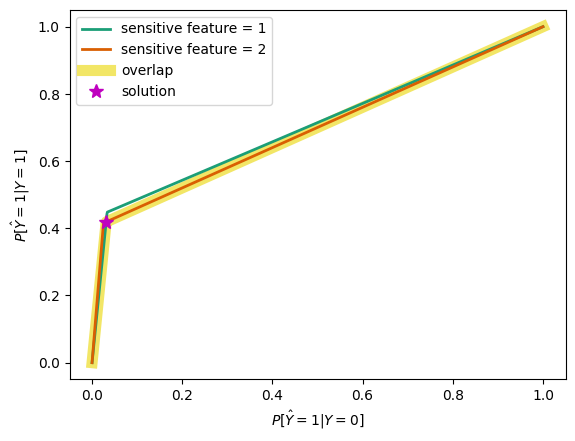

In [14]:
#SAME AS X2 BUT WITH DIFFRENT CONSTRAINT
sensitive_train = X_train['X2']
sensitive_test = X_test['X2']
threshold_optimizer = ThresholdOptimizer(
    estimator=model,
    objective="balanced_accuracy_score",
    constraints="equalized_odds",
)
threshold_optimizer.fit(X_train, y_train, sensitive_features=sensitive_train)

plot_threshold_optimizer(threshold_optimizer)

In [15]:
y_pred = threshold_optimizer.predict(X_test, sensitive_features=sensitive_test)

# Measure accuracy
accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6443906840755391


array([[<Axes: title={'center': 'accuracy'}, xlabel='X2'>,
        <Axes: title={'center': 'precision'}, xlabel='X2'>,
        <Axes: title={'center': 'false positive rate'}, xlabel='X2'>],
       [<Axes: title={'center': 'false negative rate'}, xlabel='X2'>,
        <Axes: title={'center': 'selection rate'}, xlabel='X2'>,
        <Axes: xlabel='X2'>],
       [<Axes: xlabel='X2'>, <Axes: xlabel='X2'>, <Axes: xlabel='X2'>]],
      dtype=object)

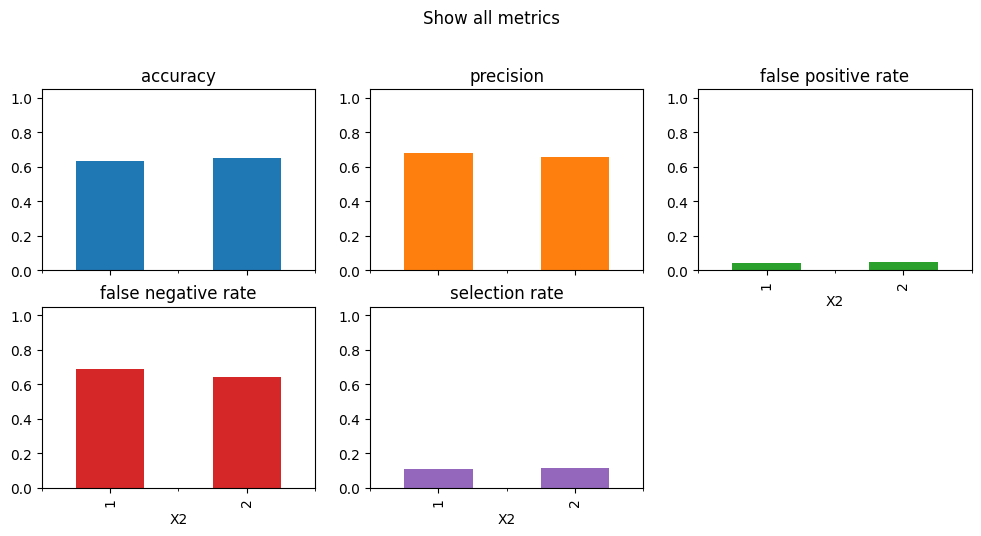

In [16]:
from fairlearn.metrics import (
    MetricFrame,
    count,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)
# Analyze metrics using MetricFrame
metrics = {
    "accuracy": balanced_accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=sensitive_test
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    ylim=[0,1.05],
    title="Show all metrics",
)


In [17]:

# Statistical Parity
stat_parity_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity Difference: {stat_parity_diff}")

stat_parity_rto = demographic_parity_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity ratio: {stat_parity_rto}")

# Equalized Odds
equal_odds_diff = equalized_odds_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Difference: {equal_odds_diff}")

equal_odds_rto = equalized_odds_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Ratio: {equal_odds_rto}")

Statistical Parity Difference: 0.0063301086057532124
Statistical Parity ratio: 0.9447568058150088
Equalized Odds Difference: 0.044167655199683686
Equalized Odds Ratio: 0.8757784697508897


/usr/local/lib/python3.10/dist-packages/fairlearn/postprocessing/_threshold_optimizer.py:292: FutureWarning: 'predict_method' default value is changed from 'predict' to 'auto'. Explicitly pass `predict_method='predict' to replicate the old behavior, or pass `predict_method='auto' or other valid values to silence this warning.
  warn(


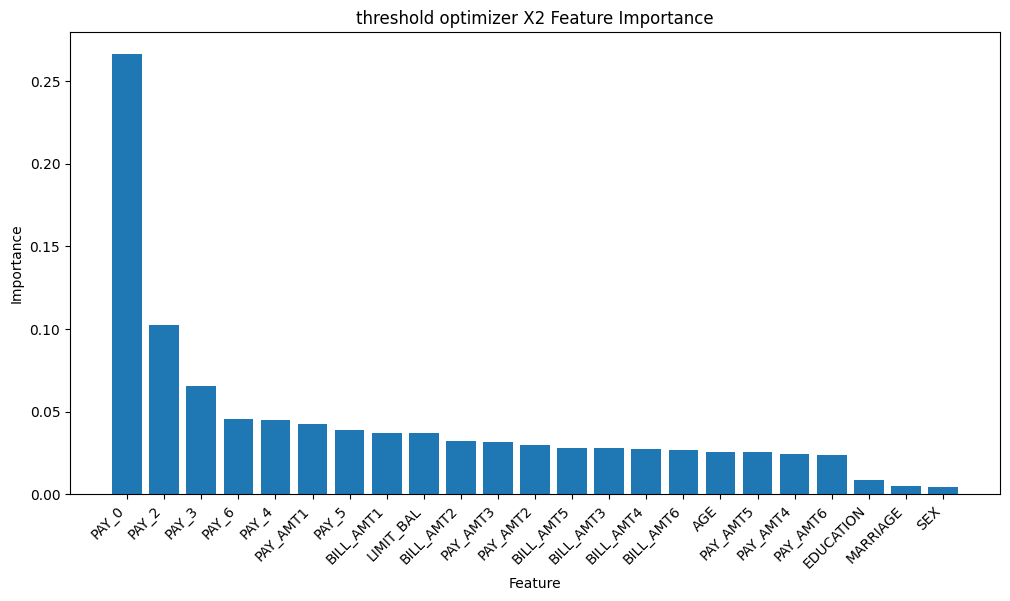

In [21]:
import matplotlib.pyplot as plt
from fairlearn.postprocessing import ThresholdOptimizer

# Fit the model
model.fit(X_train, y_train)

# Fit the threshold optimizer
threshold_optimizer.fit(X_train, y_train, sensitive_features=sensitive_train)

# Get feature importances after applying the threshold optimizer
optimized_feature_importances = threshold_optimizer.estimator_.feature_importances_

# Create a DataFrame for feature names and their importance scores
optimized_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': optimized_feature_importances})

# Sort the DataFrame by importance in descending order
optimized_feature_importance_df = optimized_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the bar chart for optimized feature importance
plt.figure(figsize=(12, 6))
plt.bar(optimized_feature_importance_df['Feature'], optimized_feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('threshold optimizer X2 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()


##X2, reweighting: Accuracy: 0.6567249693555116

Statistical Parity Difference: 0.007498779913683404

Statistical Parity ratio: 0.940856798953208

Equalized Odds Difference: 0.02724396994859629

Equalized Odds Ratio: 0.8687067847882454


In [22]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, precision_score, roc_auc_score
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference, equalized_odds_difference
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
import seaborn as sns
from fairlearn.preprocessing import CorrelationRemover

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [27]:
sensitive_train= X_train["X2"]
sensitive_test= X_test["X2"]

# Calculate selection rate for each sensitive group
selection_rate_male = y_train[sensitive_train == 1].mean()
selection_rate_female = y_train[sensitive_train == 2].mean()

# Calculate inverse of selection rate
inverse_rate_male = 1 / selection_rate_male if selection_rate_male> 0 else 1
inverse_rate_female = 1 / selection_rate_female if selection_rate_female > 0 else 1

# Normalize the weights to make them sum to the number of samples (keeps the effective size of the dataset unchanged)
normalization_factor = (len(y_train) / (inverse_rate_male * (sensitive_train == 1).sum() + inverse_rate_female * (sensitive_train == 2).sum()))

# Create sample weights based on the sensitive feature
sample_weights = np.ones(len(y_train))
sample_weights[sensitive_train == 1] = inverse_rate_male * normalization_factor
sample_weights[sensitive_train == 2] = inverse_rate_female * normalization_factor

clf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150)
clf.fit(X_train, y_train, sample_weight=sample_weights)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]

In [28]:
accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Measure AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC: {auc}")

Accuracy: 0.6481036802494251
AUC: 0.7777327768272686


array([[<Axes: title={'center': 'accuracy'}, xlabel='X2'>,
        <Axes: title={'center': 'precision'}, xlabel='X2'>,
        <Axes: title={'center': 'false positive rate'}, xlabel='X2'>],
       [<Axes: title={'center': 'false negative rate'}, xlabel='X2'>,
        <Axes: title={'center': 'selection rate'}, xlabel='X2'>,
        <Axes: xlabel='X2'>],
       [<Axes: xlabel='X2'>, <Axes: xlabel='X2'>, <Axes: xlabel='X2'>]],
      dtype=object)

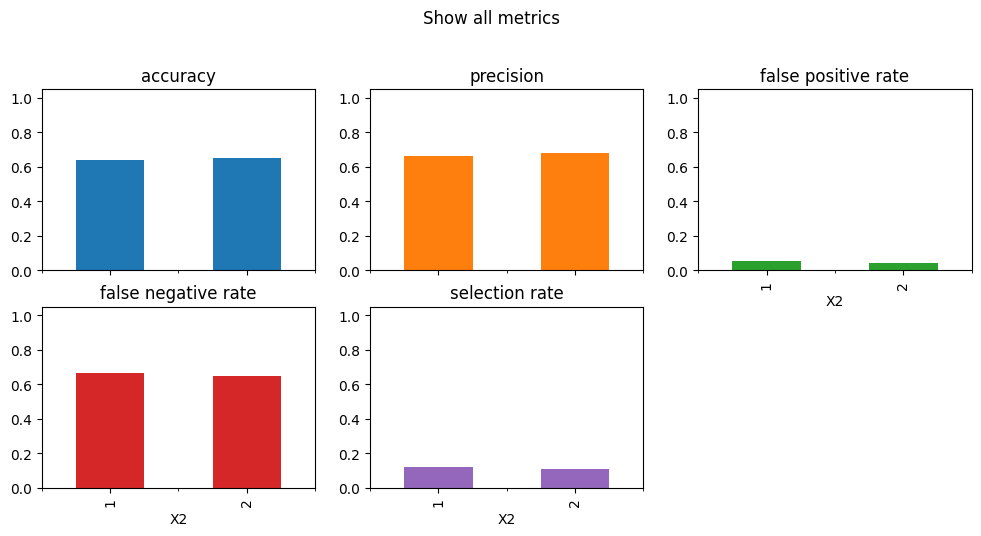

In [29]:
from fairlearn.metrics import (
    MetricFrame,
    count,
    false_negative_rate,
    false_positive_rate,
    selection_rate,
)
# Analyze metrics using MetricFrame
metrics = {
    "accuracy": balanced_accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=sensitive_test
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    ylim=[0,1.05],
    title="Show all metrics",
)

In [30]:
# Statistical Parity
stat_parity_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity Difference: {stat_parity_diff}")

stat_parity_rto = demographic_parity_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Statistical Parity ratio: {stat_parity_rto}")

# Equalized Odds
equal_odds_diff = equalized_odds_difference(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Difference: {equal_odds_diff}")

equal_odds_rto = equalized_odds_ratio(y_test, y_pred, sensitive_features=sensitive_test)
print(f"Equalized Odds Ratio: {equal_odds_rto}")

Statistical Parity Difference: 0.01085544547898852
Statistical Parity ratio: 0.9092576494115537
Equalized Odds Difference: 0.012720675458795572
Equalized Odds Ratio: 0.8438497930218806


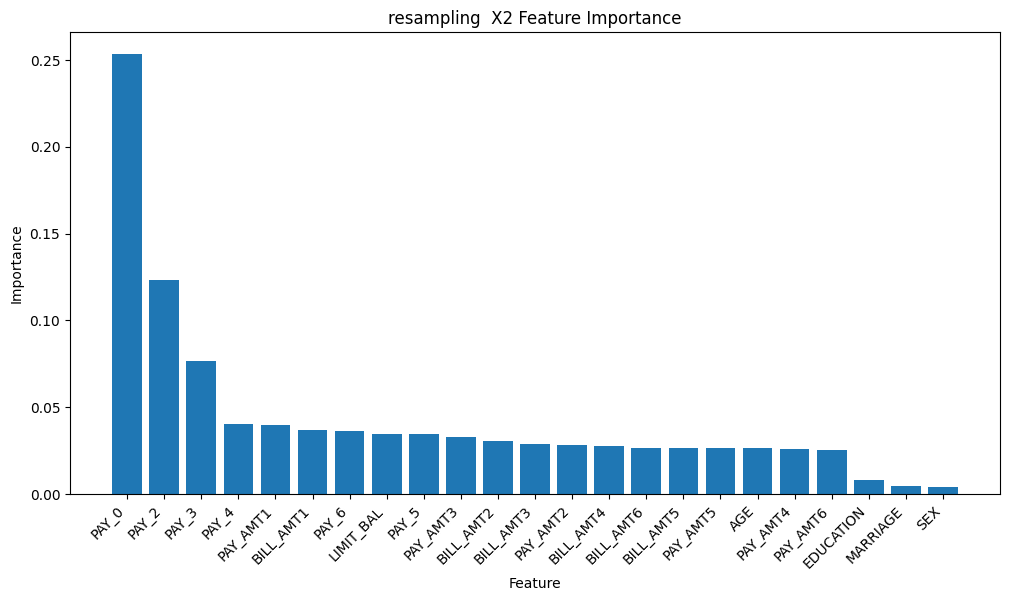

In [32]:
import matplotlib.pyplot as plt
from fairlearn.postprocessing import ThresholdOptimizer




# Get feature importances after applying the threshold optimizer
optimized_feature_importances = clf.feature_importances_

# Create a DataFrame for feature names and their importance scores
optimized_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': optimized_feature_importances})

# Sort the DataFrame by importance in descending order
optimized_feature_importance_df = optimized_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the bar chart for optimized feature importance
plt.figure(figsize=(12, 6))
plt.bar(optimized_feature_importance_df['Feature'], optimized_feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('resampling  X2 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()
